In [36]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import plotly.express as px

In [17]:
url = 'https://github.com/natetheknight75/nflgt/raw/main/nf_best.csv'

df = pd.read_csv(url)

In [18]:
df = df.drop(['PlayerKey', 'GameID'], axis = 1)

In [19]:
df.dtypes

BodyPart        object
Surface         object
DM_M1             bool
DM_M7             bool
DM_M28            bool
DM_M42            bool
StadiumType     object
FieldType       object
Temperature    float64
Weather         object
PlayType        object
Position        object
dtype: object

In [12]:
df

,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42,StadiumType,FieldType,Temperature,Weather,PlayType,Position
0,Knee,Synthetic,True,True,True,True,Indoor,Synthetic,NaN,NaN,Kickoff,D_Skilled
1,Knee,Natural,True,True,False,False,Indoor,Natural,NaN,NaN,Kickoff,D_Skilled
2,Ankle,Synthetic,True,True,True,True,Outdoor,Synthetic,63.0,Clear,Pass,D_Skilled
3,Ankle,Natural,True,False,False,False,Outdoor,Natural,80.0,Cloudy,Kickoff,D_Skilled
4,Ankle,Synthetic,True,True,True,True,Indoor,Synthetic,NaN,NaN,Rush,O_Skilled
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Foot,Synthetic,True,True,False,False,Outdoor,Synthetic,40.0,Clear,Rush,O_Skilled
96,Knee,Synthetic,True,False,False,False,Indoor,Synthetic,NaN,NaN,Rush,O_Skilled
97,Knee,Synthetic,True,False,False,False,Indoor,Synthetic,NaN,NaN,Pass,O_Skilled
98,Knee,Natural,True,True,False,False,Outdoor,Natural,56.0,Clear,Kickoff,D_Skilled


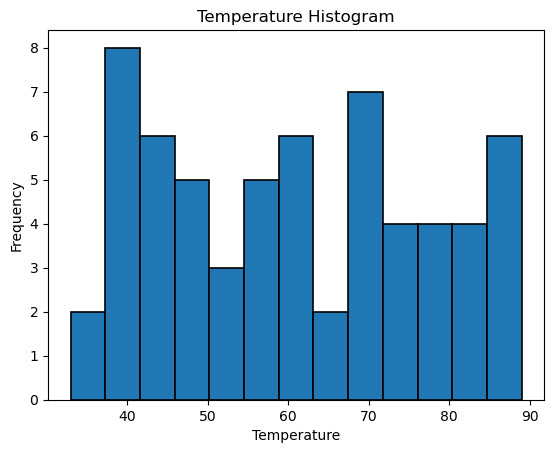

In [17]:
#graph1 

plt.hist(df['Temperature'].dropna(), bins=13, edgecolor = 'black', linewidth = 1.2)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Histogram')
plt.show()


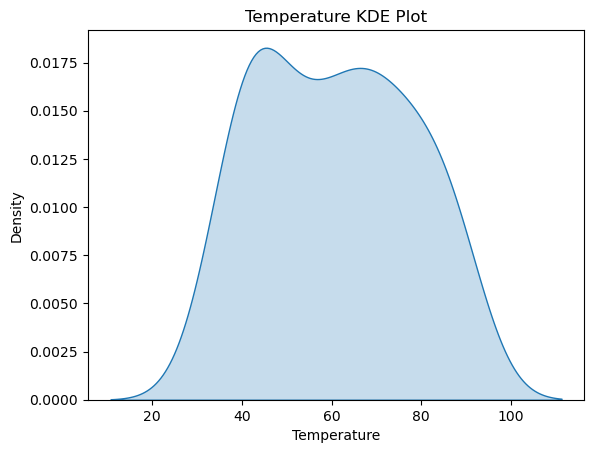

In [42]:
# Create a KDE plot
sns.kdeplot(df['Temperature'].dropna(), shade=True)

# Set labels and title
plt.xlabel('Temperature')
plt.ylabel('Density')
plt.title('Temperature KDE Plot')

plt.show()

In [45]:
import pandas as pd

# Assuming your DataFrame is named 'df'
skewness = df['Temperature'].skew()

print("Skewness coefficient:", skewness)


Skewness coefficient: 0.11601806527989707


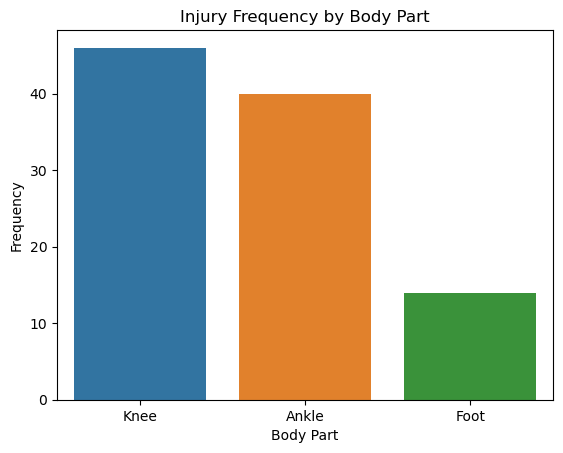

In [21]:
#graph2 
sns.countplot(data=df, x='BodyPart')
plt.xlabel('Body Part')
plt.ylabel('Frequency')
plt.title('Injury Frequency by Body Part')
plt.show()



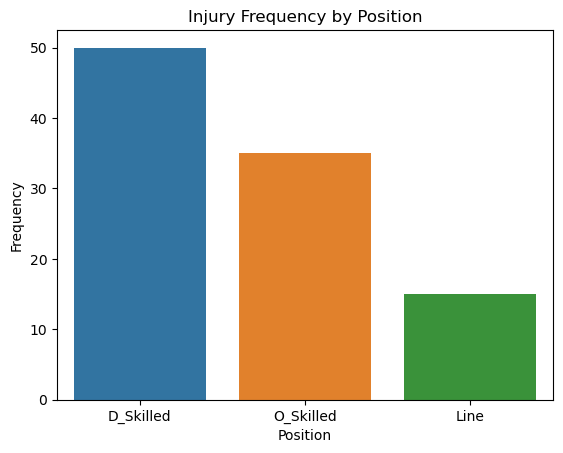

In [29]:
sns.countplot(data=df, x='Position')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.title('Injury Frequency by Position')
plt.show()

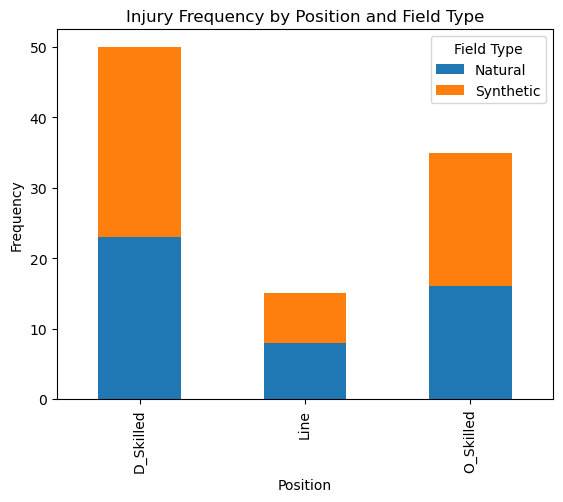

In [47]:
stacked_data = df.groupby(['Position', 'FieldType'])['FieldType'].count().unstack().fillna(0)
stacked_data.plot(kind='bar', stacked=True)
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.title('Injury Frequency by Position and Field Type')
plt.legend(title='Field Type')
plt.show()


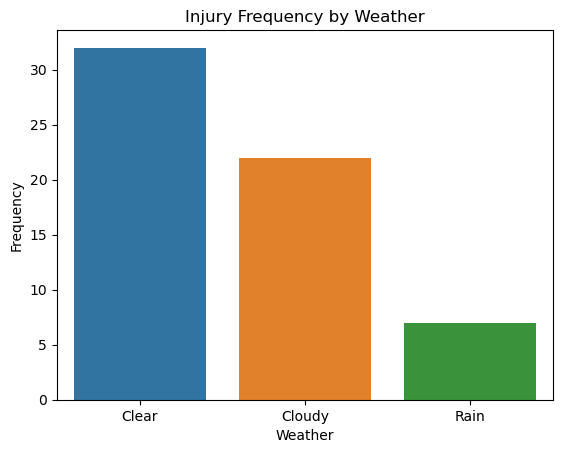

In [44]:
sns.countplot(data=df, x='Weather')
plt.xlabel('Weather')
plt.ylabel('Frequency')
plt.title('Injury Frequency by Weather')
plt.show()

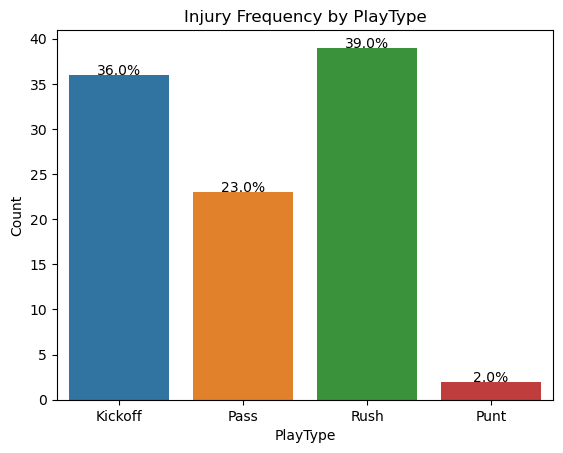

In [48]:
# Create a countplot
ax = sns.countplot(data=df, x='PlayType')

# Set labels and title
ax.set(xlabel='PlayType', ylabel='Count', title='Injury Frequency by PlayType')

# Calculate the total count
total_count = len(df)

# Place the count and percentage on top of each bar
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total_count:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, count), ha='center', va='baseline')

plt.show()


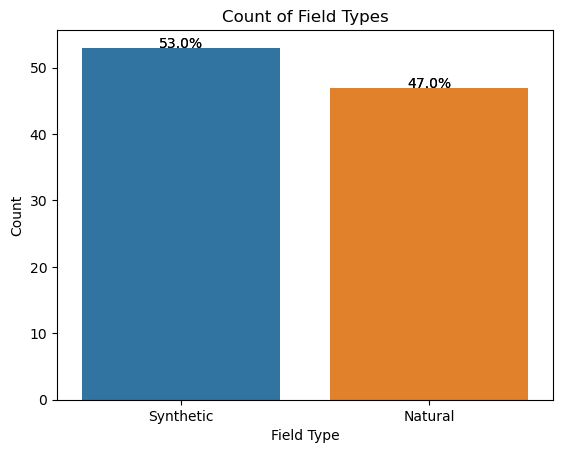

In [41]:
sns.countplot(data=df, x='FieldType')
plt.xlabel('FieldType')
plt.ylabel('Percentage')
plt.title('Injury Frequency by Percentage')
# Create a countplot
ax = sns.countplot(data=df, x='FieldType')

# Set labels and title
ax.set(xlabel='Field Type', ylabel='Count', title='Count of Field Types')

# Calculate the total count
total_count = len(df)

# Place the count and percentage on top of each bar
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total_count:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, count), ha='center', va='baseline')

plt.show()
plt.show()

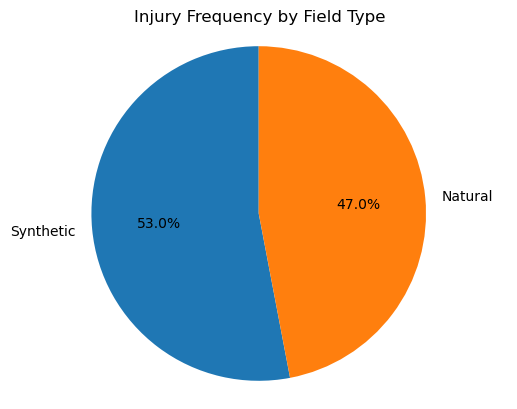

In [41]:
import matplotlib.pyplot as plt

# Calculate the counts of each field type
field_counts = df['FieldType'].value_counts()

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(field_counts, labels=field_counts.index, autopct='%1.1f%%', startangle=90)

# Set the title and make it look like a circle
ax.set_title('Injury Frequency by Field Type')
ax.axis('equal')

plt.show()


In [48]:
# define the observed and expected values as a 2D array
from scipy.stats import chi2

# Define the chi-square test statistic and degrees of freedom
test_statistic = 0.360
degrees_of_freedom = 1

# Calculate the p-value using the chi-square distribution and the degrees of freedom
p_value = '.5485'

# Output the results
print(f"Chi-square test statistic: {test_statistic:.3f}")
print(f"Two-tailed p-value: {p_value}")


Chi-square test statistic: 0.360
Two-tailed p-value: .5485


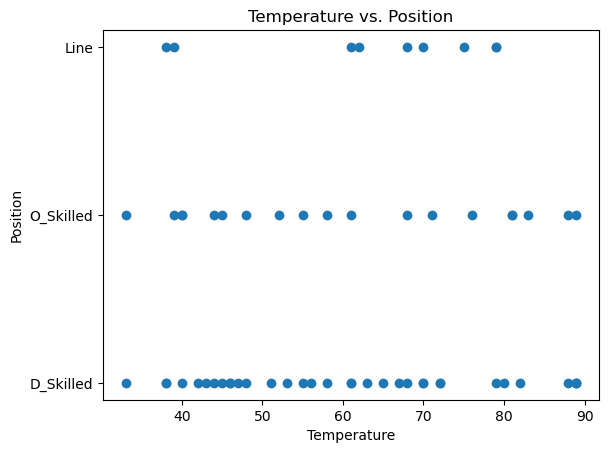

In [23]:
#graph4
plt.scatter(df['Temperature'], df['Position'])
plt.xlabel('Temperature')
plt.ylabel('Position')
plt.title('Temperature vs. Position')
plt.show()


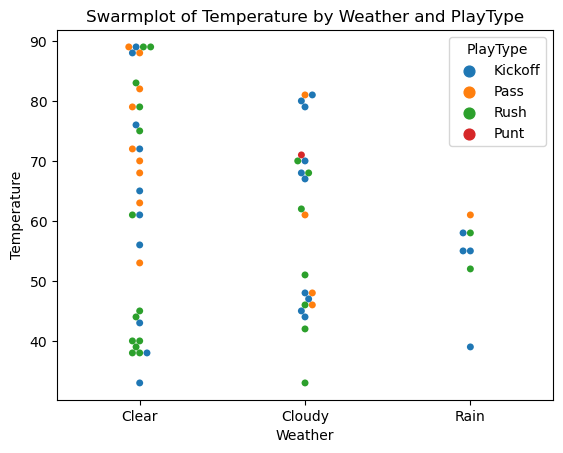

In [51]:
#5
sns.swarmplot(x='Weather', y='Temperature', hue='PlayType', data=df)
plt.xlabel('Weather')
plt.ylabel('Temperature')
plt.title('Swarmplot of Temperature by Weather and PlayType')
plt.show()


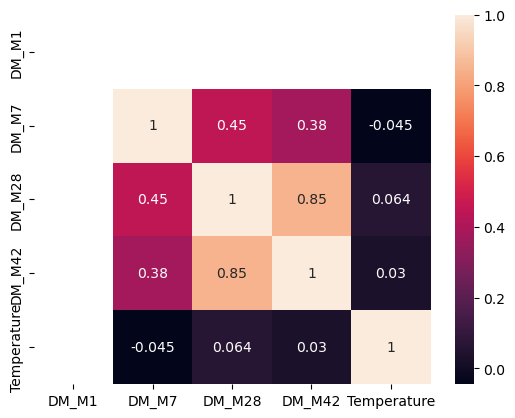

In [31]:
#6
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


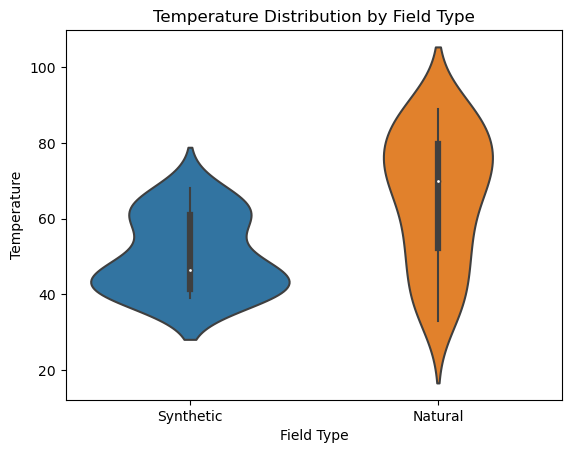

In [32]:
#7
sns.violinplot(data=df, x='FieldType', y='Temperature')
plt.xlabel('Field Type')
plt.ylabel('Temperature')
plt.title('Temperature Distribution by Field Type')
plt.show()


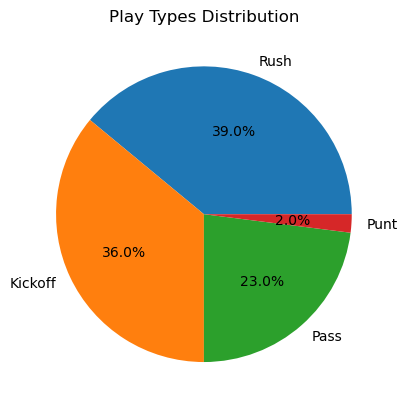

In [33]:
#8
playtype_counts = df['PlayType'].value_counts()
plt.pie(playtype_counts, labels=playtype_counts.index, autopct='%1.1f%%')
plt.title('Play Types Distribution')
plt.show()


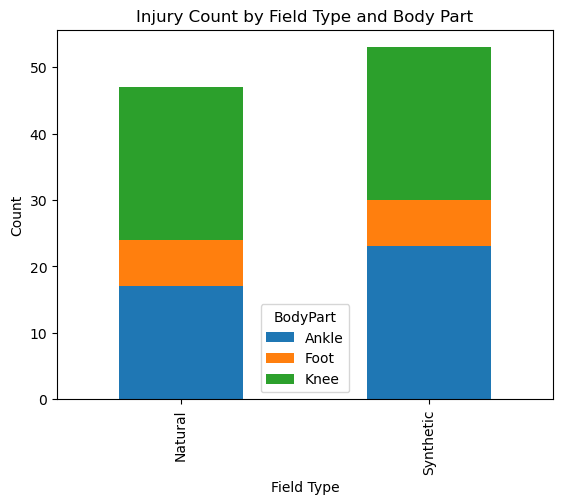

In [50]:
#9
df_stacked = df.groupby(['FieldType', 'BodyPart']).size().unstack()
df_stacked.plot(kind='bar', stacked=True)
plt.xlabel('Field Type')
plt.ylabel('Count')
plt.title('Injury Count by Field Type and Body Part')
plt.show()


In [11]:
pf = pd.read_csv('C:/Users/nathan.nelson/stat386/Data/Data/NFL_play.csv')
pf = pf[pf['Season'] == 2017]
pf

C:\Users\nathan.nelson\AppData\Local\Temp\ipykernel_1088\1285505955.py:1: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  pf = pd.read_csv('C:/Users/nathan.nelson/stat386/Data/Data/NFL_play.csv')


,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
362447,9/7/2017,2017090700,1,1,NaN,15:00,15,3600.0,0.0,KC,...,NaN,0.500007,0.499993,0.506018,0.493982,0.500007,0.006011,NaN,NaN,2017
362448,9/7/2017,2017090700,1,1,1.0,14:55,15,3595.0,5.0,NE,...,-2.950274,0.506018,0.493982,0.484055,0.515945,0.506018,-0.021963,0.068249,-0.090213,2017
362449,9/7/2017,2017090700,1,1,2.0,14:49,15,3589.0,6.0,NE,...,1.665474,0.484055,0.515945,0.510010,0.489990,0.484055,0.025955,-0.024329,0.050284,2017
362450,9/7/2017,2017090700,1,1,3.0,14:14,15,3554.0,35.0,NE,...,NaN,0.510010,0.489990,0.552982,0.447018,0.510010,0.042972,NaN,NaN,2017
362451,9/7/2017,2017090700,1,1,1.0,13:52,14,3532.0,22.0,NE,...,NaN,0.552982,0.447018,0.546975,0.453025,0.552982,-0.006007,NaN,NaN,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407683,12/31/2017,2017123101,29,4,NaN,0:28,1,28.0,4.0,BAL,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,2017
407684,12/31/2017,2017123101,29,4,3.0,0:28,1,28.0,0.0,BAL,...,-0.397515,0.080409,0.919591,0.050478,0.949522,0.080409,-0.029931,-0.021795,-0.008136,2017
407685,12/31/2017,2017123101,29,4,4.0,0:24,1,24.0,4.0,BAL,...,2.457114,0.050478,0.949522,0.030881,0.969119,0.050478,-0.019597,-0.030603,0.011006,2017
407686,12/31/2017,2017123101,30,4,1.0,0:14,1,14.0,10.0,BAL,...,NaN,0.030881,0.969119,0.000000,1.000000,0.969119,0.030881,NaN,NaN,2017


In [ ]:
#get percentage 

In [14]:
fpf = pf.filter(items=['PlayType', "Date"])

fpf

,PlayType,Date
362447,Kickoff,9/7/2017
362448,Pass,9/7/2017
362449,Pass,9/7/2017
362450,Run,9/7/2017
362451,Run,9/7/2017
...,...,...
407683,Timeout,12/31/2017
407684,Pass,12/31/2017
407685,Pass,12/31/2017
407686,QB Kneel,12/31/2017


In [25]:
unique_values = fpf['PlayType'].unique()

# Print the unique individual types
print(unique_values)

['Kickoff' 'Pass' 'Run' 'No Play' 'Extra Point' 'Quarter End' 'Field Goal'
 'Sack' 'Punt' 'Timeout' 'Two Minute Warning' 'QB Kneel' 'End of Game'
 'Spike' 'Half End']


In [26]:
uniquevalues = df['PlayType'].unique()

# Print the unique individual types
print(uniquevalues)

['Kickoff' 'Pass' 'Rush' 'Punt']


In [32]:
mask = fpf['PlayType'].isin(['Kickoff', 'Pass', 'Run', 'Punt'])

# Filter the DataFrame using the boolean mask
fd1 = fpf[mask]

# Print the filtered DataFrame
fd1

,PlayType,Date
362447,Kickoff,9/7/2017
362448,Pass,9/7/2017
362449,Pass,9/7/2017
362450,Run,9/7/2017
362451,Run,9/7/2017
...,...,...
407678,Pass,12/31/2017
407680,Kickoff,12/31/2017
407681,Pass,12/31/2017
407684,Pass,12/31/2017


In [34]:
obcount = fd1['PlayType'].value_counts().get('Kickoff', 0)

obcount

2557

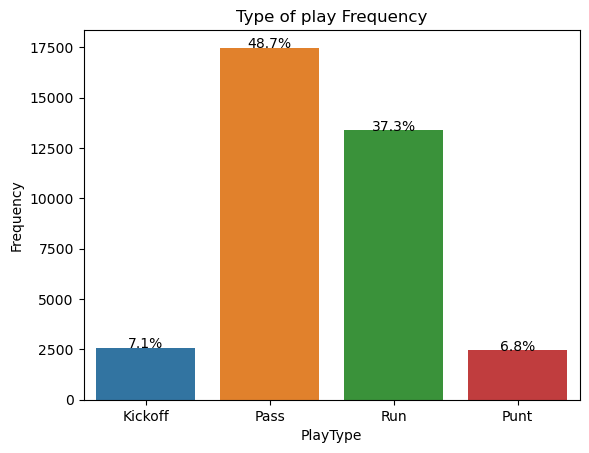

In [40]:
ax = sns.countplot(data=fd1, x='PlayType')
plt.xlabel('PlayType')
plt.ylabel('Frequency')
plt.title('Type of play Frequency')

total = len(fd1)
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.1f}%'
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, percentage, ha='center')

plt.show()



In [50]:
pf.to_csv("pf_best.csv", index=False)